# Validando nuestro modelo
Todo modelo realizado por nosotros debe ser validado, para ver como se comporta con diferentes conjuntos de datos (a parte del de entrenamiento).

**Overfitting o sobreajuste**: Esto pasa cuando el modelo se ajusta demasiado bien al dataset que le entregamos pero no es capaz de ser efectivo con conjuntos de datos diferentes

Para validarlo **vamos a partir los datos, unos para entrenamiento y otros para prueba**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [38]:
a = np.random.randn(len(data)) #construyo distribucion uniforme Normal con el mismo numero de elementos del dataset

(array([ 6., 11., 33., 35., 38., 32., 22., 10.,  6.,  7.]),
 array([-2.26770111, -1.79953398, -1.33136686, -0.86319973, -0.3950326 ,
         0.07313452,  0.54130165,  1.00946877,  1.4776359 ,  1.94580303,
         2.41397015]),
 <a list of 10 Patch objects>)

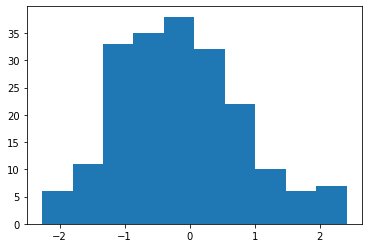

In [39]:
plt.hist(a)

Tomare el 80% de los datos para entrenar y el 20% para validar

In [40]:
check = (a<0.8)
training = data[check] #me quedo con el 80% de los datos
testing = data[~check]#lo que NO es check

In [41]:
len(training), len(testing)

(164, 36)

In [42]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [43]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     710.9
Date:                Tue, 23 Jul 2019   Prob (F-statistic):           1.25e-80
Time:                        20:59:32   Log-Likelihood:                -316.19
No. Observations:                 164   AIC:                             638.4
Df Residuals:                     161   BIC:                             647.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9084      0.323      8.997      0.000       2.270       3.547
TV             0.0454      0.002     29.220      0.000       0.042       0.049
Radio          0.1916      0.009     21.874      0.000       0.174       0.209
==============================================================================
Omnibus:                       58.236   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.134
Skew:                          -1.427   Prob(JB):                     1.14e-37
Kurtosis:                       7.092   Cond. No.                         424.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El modelo que tenemos es: **Sales = 3.0480 + 0.0459 * TV + 0.1784 * Radio**

## Validar el modelo con el conjunto de prueba o testing
Voy a predecir los valores de venta de esas variables que no he utilizado

In [44]:
sales_pred = lm.predict(testing)
sales_pred # no he utilizado estos datos para entrenar, sin embargo realizo una prediccion con ellos

5      12.671537
6      11.805233
18      9.980699
19     14.181670
20     18.141119
21     14.675210
22      6.554288
23     16.522129
28     19.407855
34      7.526155
38      9.982184
41     17.351437
42     21.558952
60      5.723111
64     17.066034
66      9.052670
72     10.448235
75     12.048068
95     16.383949
100    13.840206
104    20.305382
105    18.064742
127     6.553485
132     8.500857
133    19.315849
140     9.501097
141    18.493588
142    19.290193
154    15.485998
169    17.860439
172     7.649757
175    24.861199
184    18.524005
193    18.535340
196     8.128471
197    12.734626
dtype: float64

Ahora veamos como se separa la prediccion de los datos originales

In [45]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

103.78603440232081

In [46]:
RSE = np.sqrt(SSD/(len(testing)-2-1))#dos variables predictoras - 1 [es la formula]
RSE

1.7734236226928053

In [49]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error #un error del 12% muy parecido o igual al de nuestros datos originales 

0.12677372997804007

**un error del 12% muy parecido o igual al de nuestros datos originales**

**El modelo funciona bien y cumple las condiciones** para ser generalizado

# Resumen de las regresiones lineales

## Criterios para elegir el mejor modelo
1. **R2:** Aumenta cada que añadimos una variable predictora al modelo, eso no es sinonimo de que sea mas eficiente. A veces debemos comprobar el R2 ajustado que es un poco mas fiable

2. **R2 ajustado:** Deberia incrementarse al añadir una nueva varaible, pero NO siempre es asi. Si cree poquito la varaible nos puede estar resultando poco util o perjudicial.

3. **p-valor y estadistico-F:** 
    * Cuanto menor sea p-valor de la variable, mejor resulta añadir esa varaible especifica al modelo (_:fijate en los valores despues de E-_) En nuestro modelo agregar Radio resulto catapultando nuestro p-valor
    * El estadistico F aumenta cuando una variable predictora resulta benficiosa para el modelo

4. **RSE (Error estandar de los residuos):** Cada vez que se añade una buena varaible predictoria este valor se debe reducir. Si crece pues no es una variable adecuada

5. **Error:** Cociente entre la desviacion tipica de los residuos (lo que no podemos explicar) con respecto al promedio de la variable. Se mide en porcentaje y menor es mejor

6. **VIF:** o valor de inflacion de la varianza. Se utiliza cuando tenemos problemas de _multicolinealidad_ como entre Radio y Newspaper para decicir cual dejar pues esas se relacionaban. Se elige la que tenga el VIF mas grande

![Resultado_Regresion_Lineal](../Recursos/imgs/resum_regresiones.png)

## **Conclusion**
El modelo mas optimo es el **Modelo 3**